# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

Shama Zabeen Shaik

# I. Overview

**The overview of this project is to implement deep neural networks using tensorflow, inherit the NeuralNet class for regression,iimplement different layers of neural networks and check their accuracy and error rate.**
**The above algorithms are implemented to the dataset containing the records from direct marketing campaigns of a Porteguese Banking Institution. The dataset is divided into train and test data and the experiments are performed on both the train and the test data and then the results are compared.**

### II. INTRODUCTION OF DATA FOR CLASSIFICATION
#### SOURCE OF DATA :

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Data Set Description:

The data set considered is from the direct marketing campaigns of a Porteguese Banking Institution. The campaigns were mostly phone call based, with more than one contact requirement to the client in order to access if the subscription was made or not. The data set is a CSV file with 17 inputs, ordered by date.

The classification Goal is to predict if the client would subscribe (yes/no) a term deposit (variable y).

The Data set has the following attributes

Input variables:

Bank Client Data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other Attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and Economic Context Attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy
bankFrame = pd.read_csv(r"bank.csv")
bankFrame.head(6)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [2]:
bankFrame = pd.read_csv("bank.csv")
# bankFrame.head()

In [3]:
if np.any(bankFrame.isnull()) == True:
    bankFrame = bankFrame.fillna(0)

In [4]:
marital_dict = {"divorced":1,"married":2,"single":3}
education_dict = {'primary':1,'secondary':2,'tertiary':3,'unknown':4}
default_dict = {'no':0,'yes':1}
housing_dict = {'no':0,'yes':1}
loan_dict = {'no':0,'yes':1}
contact_dict = {'cellular':1,'telephone':2,'unknown':3}
month_dict = {"jan": 1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, 
            "jul": 7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec": 12}
outcome_dict = {"failure":1,"other":2,"unknown":3,"success":4}
deposit_dict = {"no":0,"yes":1}

In [5]:
def marital_conv(s):
    return marital_dict[s]

def education_conv(s):
    return education_dict[s]

def default_conv(s):
    return default_dict[s]

def housing_conv(s):
    return housing_dict[s]

def loan_conv(s):
    return loan_dict[s]

def contact_conv(s):
    return contact_dict[s]

def month_conv(s):
    return month_dict[s]

def outcome_conv(s):
    return outcome_dict[s]

def deposit_conv(s):
    return deposit_dict[s]

In [6]:
from sklearn.preprocessing import LabelEncoder
bank = bankFrame.iloc[:,:-1]

lb_make = LabelEncoder()
bank["job"] = lb_make.fit_transform(bank["job"])
#bank

In [7]:
bankFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Checking if there are any missing values in any of the attributes in the data set. Since the total count of instances in all the attributes is the same, we can understand that there are no missing values and can now continue with the furthur stages of pre-processing**

In [8]:
bankFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


Since the months in the data set are in the format of Character and not numbers, making the data symmetric by changing days from numbers to characters.

In [9]:
if np.any(bankFrame.isnull()) == True:
    bankFrame= bankFrame.fillna(0)

In [10]:
marital_dict = {"divorced":1,"married":2,"single":3}
education_dict = {'primary':1,'secondary':2,'tertiary':3,'unknown':4}
default_dict = {'no':0,'yes':1}
housing_dict = {'no':0,'yes':1}
loan_dict = {'no':0,'yes':1}
contact_dict = {'cellular':1,'telephone':2,'unknown':3}
month_dict = {"jan": 1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, 
            "jul": 7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec": 12}
outcome_dict = {"failure":1,"other":2,"unknown":3,"success":4}
deposit_dict = {"no":0,"yes":1}

### Histogram and Normal Probability Plot

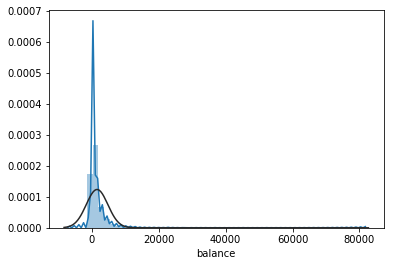

In [11]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
sns.distplot(bankFrame['balance'], fit = norm);
fig = plt.figure()
plt.show();

**Since the data is mostly skewed, and has very less error on skeweness, we are proceeding with the visualization.**

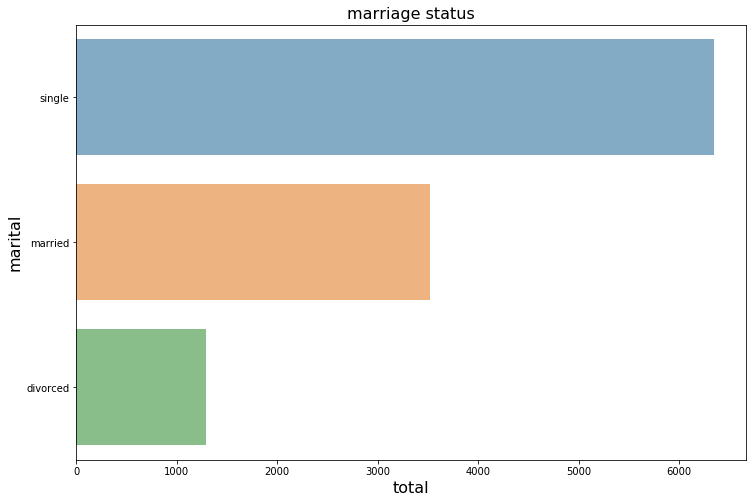

In [12]:
plt.figure(figsize=(12,8))
marital = bankFrame['marital'].value_counts()
sns.barplot(y=marital.index, x=marital.values, alpha=0.6)
plt.yticks(range(len(bankFrame['marital'].value_counts().index)), ['single', 'married','divorced'])
plt.title("marriage status", fontsize=16)
plt.xlabel("total", fontsize=16)
plt.ylabel("marital", fontsize=16)
plt.show();

## <font color ='blue'> BAR PLOT </font>

** *The above bar-plot shows the marital status of all the customers that were approached for the subscription. From the above plot, we can infer that the majority of the population that are being surved are singles and there could be a high probability of singles accepting more subsciptions.* **

*<font color= 'red'>We can also assume that there could a propability of the number of singles accepting the subsciption would be high in number compared to other sets of population as they stand the heighest in the total. </font>*

In [13]:
from sklearn.preprocessing import LabelEncoder
bank = bankFrame.iloc[:,:-1]

lb_make = LabelEncoder()
bank["job"] = lb_make.fit_transform(bank["job"])

## COUNT PLOT

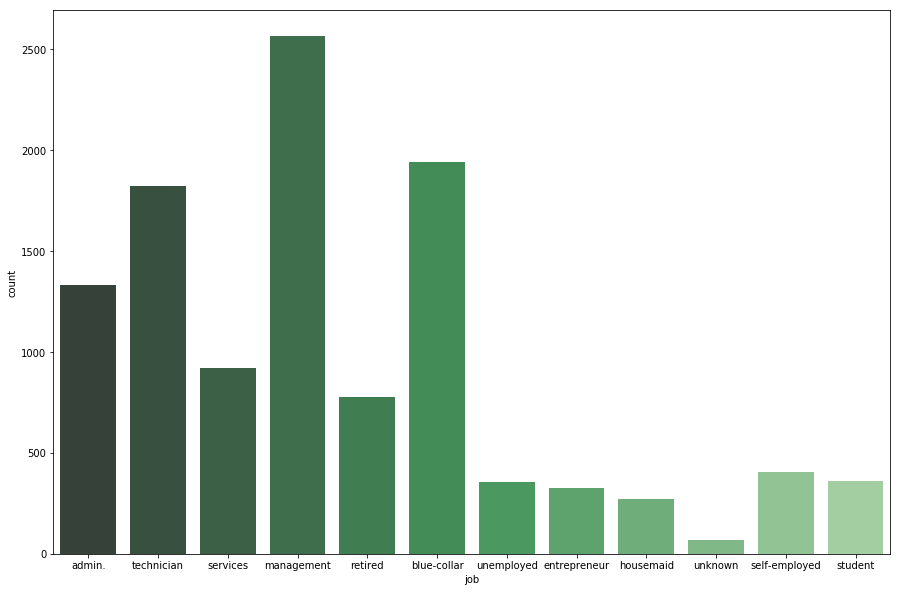

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x="job", data =bankFrame, palette="Greens_d");
plt.show();

** Counting the number of employees in each job domain so as to have an over view of what could be the number of people activating the subscription from the number of people contacted for subscribing.
Of all the job roles, the people that are most likely to subscribe are most from management as there are more number of people from that job role.**

## BOX PLOT

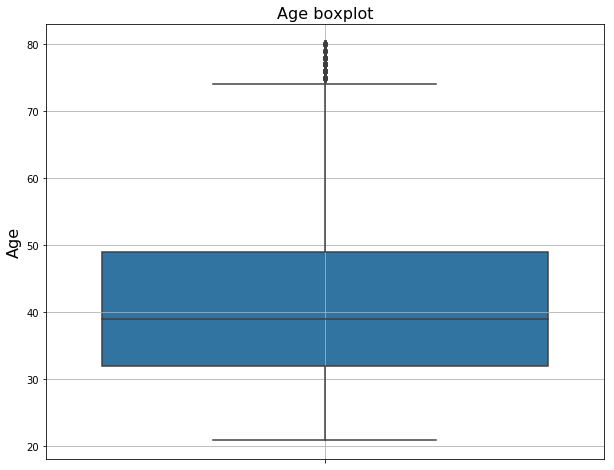

In [15]:
plt.figure(figsize=(12,8))
age=bankFrame[(bankFrame['age']>=21) & (bankFrame['age']<=80) ]
plt.figure(figsize=(10,8))
sns.boxplot( y=age['age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

### BOX PLOT FOR AGE

**The median for the age is aroud 39 and most participants are aged between 33 - 49. **

## SCATTER PLOT

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


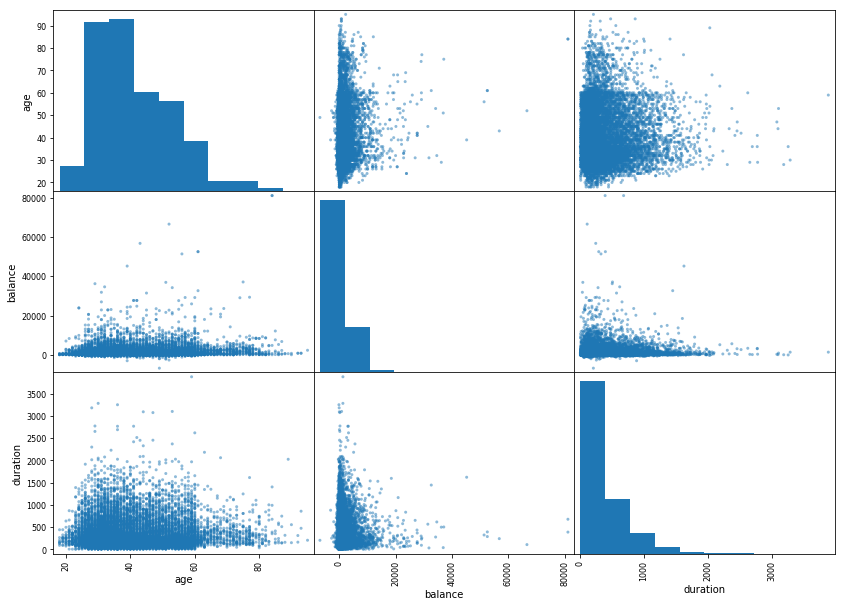

In [16]:
from pandas.tools.plotting import scatter_matrix

attributes = ['age','balance','duration',]
scatter_matrix(bankFrame[attributes], figsize = (14,10))
plt.show();

#### Scatter Plot:
**Some inferences that could be made from the above scatter plot are :** 
<br>

<font color='blue'> 1. As the age increases, the balance and duration left for payment decreases, also the age that has most amoiunt due is around 20-40 </font> 

<font color='blue'> 2. As the balance decreases, the duration left for payment decreases.

### BAR PLOT

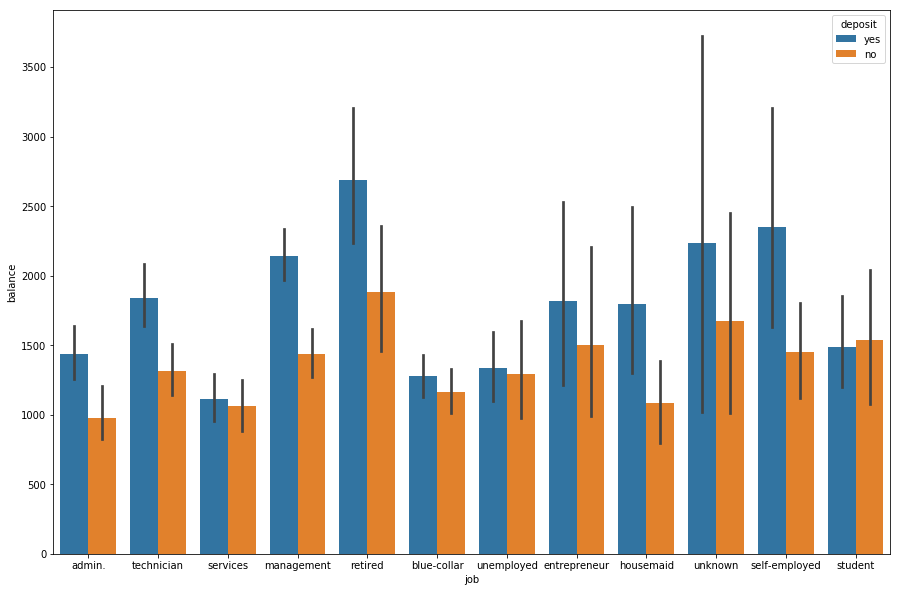

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x="job", y="balance", hue="deposit", data=bankFrame);
plt.show();

## ** BAR PLOT**

**
The above plot is showing a comparision between the job and the balance of the customers that were approached for subscription. The plot shows the rate of acceptance of the subsciption of the term deposits vary with respect to job of the person.**

**Refering to the heighest 'yes' in the plot, the retired people are the one's that have most subsciptions, which says that since, they have no income now and have an amount in their bank as balance, it is more secured for them to have an automatic term deposit which could be used in times of emergence.**

**Referring to the student, the most subsciptions are 'no' as most of the students are dependent on their parents and not not-self employeed.**


**As the self-employeed people have an income the term-deposits are like a good source of savings and hence the subsciptions are mostly, yes.**


**People from the services job domain, have a very secured amount of income, so there might not be an immediate need of instant savings, and hence haven't accepted the subscription.
**

### PIE CHART AND COUNT PLOT

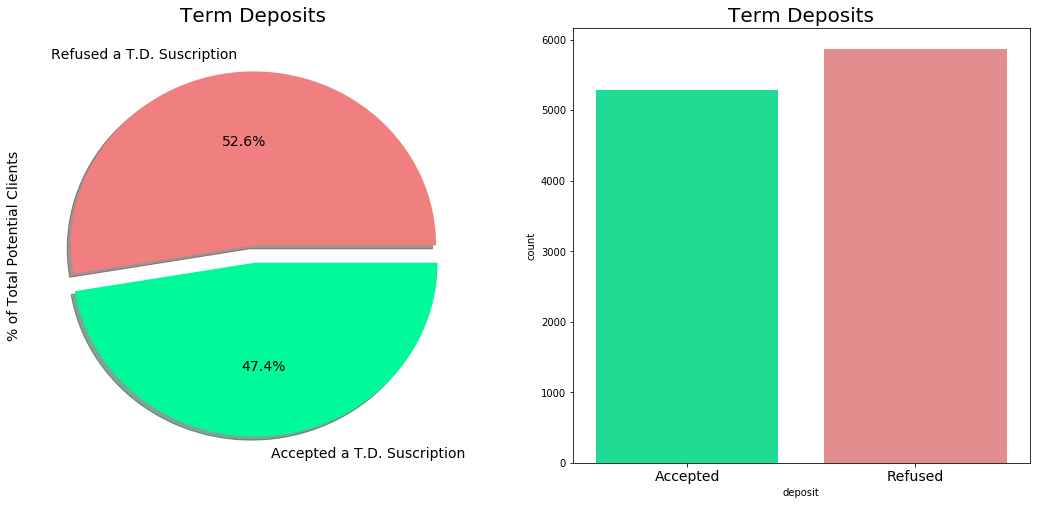

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08080", "#00FA9A"]
colors1=["#00FA9A","#F08080"]
labels = 'Refused a T.D. Suscription', 'Accepted a T.D. Suscription'
bankFrame['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('deposit',data=bankFrame,ax=ax[1], palette=colors1)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Accepted', 'Refused'], fontsize=14)
plt.show()

### PIE CHART AND COUNT PLOT 

** The PIECHART gives the percentage of the people that are more like to accept the subscription and the count plot gives a number of the people subscribing or not subscribing. **

It can be inferred from the above visualizations that the number of subscriptions are going to be majorly refused and a slightly mess are going to be accepted by the people.

## MODEL 1


**Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.**

User friendliness. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

Modularity. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as little restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

Easy extensibility. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.

Work with Python. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.

For the first model, I am making use of 5 hidden layers with 6,5,4,5,6,1 number of inputs in each layer.

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


In [21]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]


In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import time

Using TensorFlow backend.


In [25]:
# Initialising the ANN
classifier = Sequential()


In [26]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [27]:
# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))


In [28]:
# Adding the third hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))


In [29]:
# Adding the fourth hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))


In [30]:
# Adding the fifth hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [31]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training set
stime1 = time.clock()
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 3s 418us/step - loss: 0.6135 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 3s 352us/step - loss: 0.5343 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 3s 347us/step - loss: 0.5120 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 308us/step - loss: 0.5071 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 2s 297us/step - loss: 0.5062 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 2s 294us/step - loss: 0.5060 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 2s 311us/step - loss: 0.5060 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 2s 305us/step - loss: 0.5059 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 2s 298us/step - loss: 0.5059 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 2s 302us/step - loss: 0.5060 - acc: 0.7960

In [34]:
etime1 = time.clock()

In [40]:
print(etime1-stime1)

261.09910299999996


In [35]:
history_callback = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
loss_history_m1=history_callback.history["loss"]

Epoch 1/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.5060 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 2s 233us/step - loss: 0.5060 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 227us/step - loss: 0.5059 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 223us/step - loss: 0.5059 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.5060 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 2s 219us/step - loss: 0.5060 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 2s 229us/step - loss: 0.5060 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 2s 227us/step - loss: 0.5060 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.5059 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 2s 225us/step - loss: 0.5060 - acc: 0.7960

In [36]:
print(loss_history_m1)

[0.50596029859036207, 0.50595768455415968, 0.50593797199428081, 0.50593928327783944, 0.50595184447243813, 0.50595725631341337, 0.50596374770626429, 0.50595141934230925, 0.50593457469716663, 0.50595422120764855, 0.50594847217202188, 0.50596348559483884, 0.50593914477154611, 0.50595300329849124, 0.50593604128807779, 0.50595115195959806, 0.5059299363195896, 0.50597129764035342, 0.50592905998229976, 0.50591735852882269, 0.50591190274804831, 0.50594173105433582, 0.50593129388988023, 0.50595301717519758, 0.50595200454816225, 0.50594906423240904, 0.50593685373663899, 0.50595334004610781, 0.50596973160281777, 0.50595654899254439, 0.505963832102716, 0.50596429985016589, 0.50595107706263664, 0.50594499571248885, 0.50596257971599701, 0.50595015656203035, 0.50594454210251572, 0.50595658503472807, 0.50595372978597875, 0.50595641864463692, 0.50594423761591312, 0.50593538619577882, 0.50595854014158248, 0.50596157068386671, 0.50594605293124917, 0.50595219084993004, 0.50595390483736991, 0.5059650427289

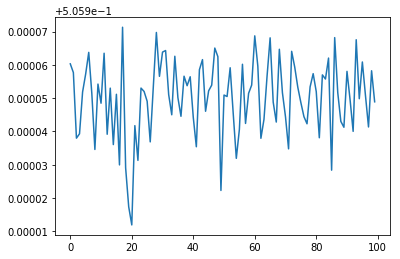

In [37]:
plt.plot(loss_history_m1)

In [41]:
## Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [42]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


**The loss rate and the accuracy percent have been constant when this model was implemented. Since the loss rate has to decrease and the accuracy has to increase as the batches trained increase, we can infer that this model isn't a good fit for my dataset**

Different behaviors during training and testing
Some Keras layers (e.g. Dropout, BatchNormalization) behave differently at training time and testing time. You can tell whether a layer uses the "learning phase" (train/test) by printing layer.uses_learning_phase, a boolean: True if the layer has a different behavior in training mode and test mode, False otherwise.

If your model includes such layers, then you need to specify the value of the learning phase as part of feed_dict, so that your model knows whether to apply dropout/etc or not.

The Keras learning phase (a scalar TensorFlow tensor) is accessible via the Keras backend:

## Method 2

In [44]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]


In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import time

In [48]:
# Initialising the ANN
classifier = Sequential()


In [49]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [50]:
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))


In [51]:
# Adding the third hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


In [52]:
# Adding the fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))


In [53]:
# Adding the fifth hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))


In [54]:
# Adding the sixth hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [55]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [56]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
# Fitting the ANN to the Training set
stime2 = time.clock()
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 3s 335us/step - loss: 0.4839 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.4291 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 244us/step - loss: 0.4212 - acc: 0.8120
Epoch 4/100
8000/8000 [==============================] - 2s 274us/step - loss: 0.4187 - acc: 0.8260
Epoch 5/100
8000/8000 [==============================] - 2s 300us/step - loss: 0.4167 - acc: 0.8290
Epoch 6/100
8000/8000 [==============================] - 2s 243us/step - loss: 0.4144 - acc: 0.8300
Epoch 7/100
8000/8000 [==============================] - 2s 284us/step - loss: 0.4139 - acc: 0.8324
Epoch 8/100
8000/8000 [==============================] - 2s 284us/step - loss: 0.4128 - acc: 0.8339
Epoch 9/100
8000/8000 [==============================] - 2s 283us/step - loss: 0.4112 - acc: 0.8330
Epoch 10/100
8000/8000 [==============================] - 2s 284us/step - loss: 0.4096 - acc: 0.8339

In [58]:
etime2 = time.clock()

In [60]:
print(etime2-stime2)

279.333222


In [61]:
history_callback = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
loss_history_m2=history_callback.history["loss"]

Epoch 1/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.4017 - acc: 0.8359
Epoch 2/100
8000/8000 [==============================] - 2s 250us/step - loss: 0.4019 - acc: 0.8352
Epoch 3/100
8000/8000 [==============================] - 2s 252us/step - loss: 0.4018 - acc: 0.8331
Epoch 4/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4009 - acc: 0.8341
Epoch 5/100
8000/8000 [==============================] - 2s 255us/step - loss: 0.4011 - acc: 0.8351
Epoch 6/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4018 - acc: 0.8347
Epoch 7/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.4021 - acc: 0.8349
Epoch 8/100
8000/8000 [==============================] - 2s 251us/step - loss: 0.4017 - acc: 0.8347
Epoch 9/100
8000/8000 [==============================] - 2s 256us/step - loss: 0.4014 - acc: 0.8345
Epoch 10/100
8000/8000 [==============================] - 2s 243us/step - loss: 0.4017 - acc: 0.8342

8000/8000 [==============================] - 2s 241us/step - loss: 0.4005 - acc: 0.8369
Epoch 83/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4015 - acc: 0.8360
Epoch 84/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4013 - acc: 0.8350
Epoch 85/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4008 - acc: 0.8339
Epoch 86/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.4008 - acc: 0.8335
Epoch 87/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.4005 - acc: 0.8350
Epoch 88/100
8000/8000 [==============================] - 2s 249us/step - loss: 0.4011 - acc: 0.8364
Epoch 89/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4009 - acc: 0.8349
Epoch 90/100
8000/8000 [==============================] - 2s 246us/step - loss: 0.4014 - acc: 0.8347
Epoch 91/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.4003 - acc: 0.8351
Epo

In [62]:
print(loss_history_m2)

[0.4016550537198782, 0.4018662675563246, 0.40180919745936988, 0.40087421599775552, 0.40105383923742921, 0.40184528634883465, 0.4021414169482887, 0.4016570674953982, 0.40141946238465609, 0.40166537182871254, 0.40206184119917454, 0.40168454641476276, 0.40189780426211658, 0.40270130929537118, 0.40091272721067073, 0.40241565080359576, 0.40095238176174464, 0.40125972755253314, 0.40253866802901028, 0.40229887554422022, 0.40148639738559722, 0.40267014800570905, 0.40137128049507736, 0.40178405661135913, 0.40147101724520323, 0.40173910368233917, 0.40225057654082774, 0.40156251191161574, 0.40170763481874017, 0.40240598314441739, 0.40191528672352433, 0.40173527303151785, 0.40104388830717652, 0.40208888732828202, 0.40155650435946882, 0.4022775878896937, 0.4017273103585467, 0.40178556185681374, 0.40045038038864733, 0.40115850703790784, 0.40123537858948111, 0.40236267882399263, 0.40110721104778352, 0.40128428576514125, 0.40002610856201498, 0.40170367499813436, 0.40029606219381092, 0.4015187488542869

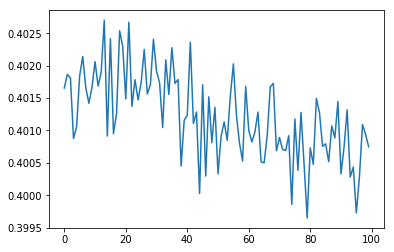

In [63]:
plt.plot(loss_history_m2)

In [64]:
## Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [65]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1546   49]
 [ 261  144]]


**The loss rate is decreasing as more batches are being trained. Also, the accuracy is constantly increasing which evidently proves that this is a good fit for the dataset used.**

Converting a Keras Sequential model for use in a TensorFlow workflow
You have found a Keras Sequential model that you want to reuse in your TensorFlow project (consider, for instance, this VGG16 image classifier with pre-trained weights). How to proceed?

First of all, note that if your pre-trained weights include convolutions (layers Convolution2D or Convolution1D) that were trained with Theano, you need to flip the convolution kernels when loading the weights. This is due Theano and TensorFlow implementing convolution in different ways (TensorFlow actually implements correlation, much like Caffe). Here's a short guide on what you need to do in this case.

Let's say that you are starting from the following Keras model, and that you want to modify so that it takes as input a specific TensorFlow tensor, my_input_tensor. This input tensor could be a data feeder op, for instance, or the output of a previous TensorFlow model.

### Method 3 with 8 hidden layers


In [67]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]


In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [69]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import time

In [71]:
# Initialising the ANN
classifier = Sequential()


In [72]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [73]:
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


In [74]:
# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))


In [75]:
# Adding the fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))


In [76]:
# Adding the fifth hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))


In [77]:
# Adding the sixth hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

In [78]:
# Adding the seventh hidden layer
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))

In [79]:
# Adding the eighth hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [80]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [81]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:
# Fitting the ANN to the Training set
stime3 = time.clock()
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 3s 371us/step - loss: 0.4974 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 2s 308us/step - loss: 0.4271 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 283us/step - loss: 0.4207 - acc: 0.8099
Epoch 4/100
8000/8000 [==============================] - 2s 283us/step - loss: 0.4172 - acc: 0.8294
Epoch 5/100
8000/8000 [==============================] - 2s 269us/step - loss: 0.4151 - acc: 0.8315
Epoch 6/100
8000/8000 [==============================] - 2s 270us/step - loss: 0.4137 - acc: 0.8331
Epoch 7/100
8000/8000 [==============================] - 2s 278us/step - loss: 0.4128 - acc: 0.8337
Epoch 8/100
8000/8000 [==============================] - 2s 267us/step - loss: 0.4108 - acc: 0.8355
Epoch 9/100
8000/8000 [==============================] - 2s 264us/step - loss: 0.4103 - acc: 0.8320
Epoch 10/100
8000/8000 [==============================] - 2s 269us/step - loss: 0.4092 - acc: 0.8344

In [83]:
etime3 = time.clock()

In [90]:
etime3-etime2

610.0030140000001

In [84]:
history_callback = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
loss_history_m3=history_callback.history["loss"]

Epoch 1/100
8000/8000 [==============================] - 2s 287us/step - loss: 0.3344 - acc: 0.8631
Epoch 2/100
8000/8000 [==============================] - 2s 289us/step - loss: 0.3339 - acc: 0.8640
Epoch 3/100
8000/8000 [==============================] - 2s 289us/step - loss: 0.3342 - acc: 0.8642
Epoch 4/100
8000/8000 [==============================] - 2s 287us/step - loss: 0.3333 - acc: 0.8646
Epoch 5/100
8000/8000 [==============================] - 2s 279us/step - loss: 0.3328 - acc: 0.8626
Epoch 6/100
8000/8000 [==============================] - 2s 282us/step - loss: 0.3341 - acc: 0.8631
Epoch 7/100
8000/8000 [==============================] - 2s 281us/step - loss: 0.3333 - acc: 0.8647
Epoch 8/100
8000/8000 [==============================] - 2s 291us/step - loss: 0.3347 - acc: 0.8642
Epoch 9/100
8000/8000 [==============================] - 2s 279us/step - loss: 0.3327 - acc: 0.8627
Epoch 10/100
8000/8000 [==============================] - 2s 282us/step - loss: 0.3323 - acc: 0.8650

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126233). Check your callbacks.
  % delta_t_median)
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185031). Check your callbacks.
  % delta_t_median)


3950/8000 [=============>................] - ETA: 4s - loss: 0.3317 - acc: 0.8661

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219070). Check your callbacks.
  % delta_t_median)


3980/8000 [=============>................] - ETA: 4s - loss: 0.3316 - acc: 0.8658

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221162). Check your callbacks.
  % delta_t_median)
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202967). Check your callbacks.
  % delta_t_median)


4020/8000 [==============>...............] - ETA: 5s - loss: 0.3322 - acc: 0.8652

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175562). Check your callbacks.
  % delta_t_median)
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149992). Check your callbacks.
  % delta_t_median)


4520/8000 [===============>..............] - ETA: 4s - loss: 0.3330 - acc: 0.8639

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131355). Check your callbacks.
  % delta_t_median)
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105840). Check your callbacks.
  % delta_t_median)


8000/8000 [==============================] - 7s 881us/step - loss: 0.3293 - acc: 0.8642
Epoch 78/100
8000/8000 [==============================] - 2s 312us/step - loss: 0.3296 - acc: 0.8646
Epoch 79/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.3297 - acc: 0.8640
Epoch 80/100
8000/8000 [==============================] - 2s 292us/step - loss: 0.3298 - acc: 0.8641
Epoch 81/100
8000/8000 [==============================] - 2s 283us/step - loss: 0.3299 - acc: 0.8639
Epoch 82/100
8000/8000 [==============================] - 2s 286us/step - loss: 0.3290 - acc: 0.8634
Epoch 83/100
8000/8000 [==============================] - 2s 291us/step - loss: 0.3288 - acc: 0.8640
Epoch 84/100
8000/8000 [==============================] - 2s 283us/step - loss: 0.3284 - acc: 0.8635
Epoch 85/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.3298 - acc: 0.8654
Epoch 86/100
8000/8000 [==============================] - 3s 317us/step - loss: 0.3289 - acc: 0.8640
Epo

In [85]:
print(loss_history_m3)

[0.33436238633468746, 0.3338569803023711, 0.33417531116399912, 0.33334371413569897, 0.33284952295245601, 0.33405604547355322, 0.33327872534282504, 0.33470973980147389, 0.33267516507301481, 0.33230390448821706, 0.33202089847531169, 0.33229456673841923, 0.33244031948968766, 0.33269017026061193, 0.33280817889608444, 0.33270936923567207, 0.3324999062344432, 0.33188499776646496, 0.33227805566973984, 0.33156694501172751, 0.33143322200747205, 0.33174320653546602, 0.33219453622121364, 0.33169800625648349, 0.33208247952163217, 0.33140720407944174, 0.33163528028642758, 0.33226653252262622, 0.33114670678507535, 0.33175252281827849, 0.33345222269184888, 0.33157815149053932, 0.33151512867305427, 0.33198403428774326, 0.33034187117125841, 0.33197365969186649, 0.33199587674345821, 0.33064845475833865, 0.33124523320235311, 0.33113815553486348, 0.3301875733397901, 0.33078950792318212, 0.32950691302772611, 0.32965072334744039, 0.3294123602285981, 0.33072434604633599, 0.33092556393239647, 0.33101789471693

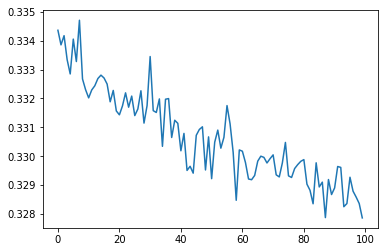

In [86]:
plt.plot(loss_history_m3)

In [87]:
## Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [88]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [89]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1534   61]
 [ 207  198]]


**With this 8 hidden layer model, The accuracy has been constantly increasing and the error rate has decreased by a lot. WE can infer that for this dataset, as the number of hidden layers increasing, the model is getting well trained and the accuracy is improving constantly. **

## Conclusions:

The model works well for 8 hidden layers. and the accuracy increases and loss percent decreases as the batches are trained more.

## EXTRA CREDIT:

CPU:

MODEL 1: 261.09910299999996
MODEL 2: 279.333222
MODEL 3: 610.0030140000001

GPU:

MODEL 1: 130.5495515
Model 2: 139.666611
MODEL 3: 244.0012056


We can infer that there is evident differene in the computation time of the CPU and the GPU as the numbe rof hidden layers increase. In my case for this dataset and the models used, I there was around a 2.25 factor difference in the CPU and the GPU time.


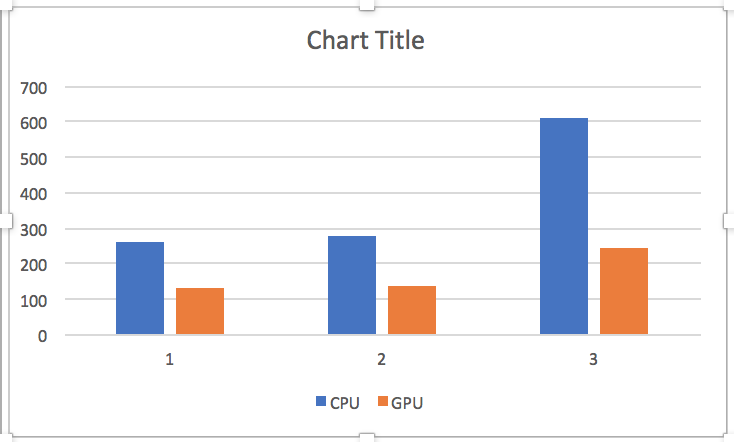